In [50]:
import matplotlib.pyplot as plt
import numpy as np
import PIL, json
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [51]:
import pathlib
data_dir = r'O:\source\repos\EVE-Online-Bot\training_data'
data_dir = pathlib.Path(data_dir)

In [52]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

10


In [53]:
batch_size = 1
img_height = 180
img_width = 180

In [54]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10 files belonging to 3 classes.
Using 8 files for training.


In [55]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10 files belonging to 3 classes.
Using 2 files for validation.


In [56]:
class_names = train_ds.class_names
print(class_names)

['connection_lost', 'in_flight', 'in_hanger']


In [58]:
f = open(r'O:\source\repos\EVE-Online-Bot\training_data\screen_state_classes.json', "a")
f.write(json.dumps(class_names))
f.close()

In [19]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [20]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
8/8 [==============================] - 5s 28ms/step - loss: 1.6301 - accuracy: 0.2500 - val_loss: 0.6108 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 0s 8ms/step - loss: 0.6227 - accuracy: 0.8750 - val_loss: 0.3843 - val_accuracy: 1.0000
Epoch 3/10
8/8 [==============================] - 0s 8ms/step - loss: 0.2600 - accuracy: 0.8750 - val_loss: 0.0623 - val_accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 0s 8ms/step - loss: 0.0495 - accuracy: 1.0000 - val_loss: 0.0175 - val_accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 0s 8ms/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0504 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 0s 7ms/step - loss: 2.6552e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 8/10
8/8 [=============

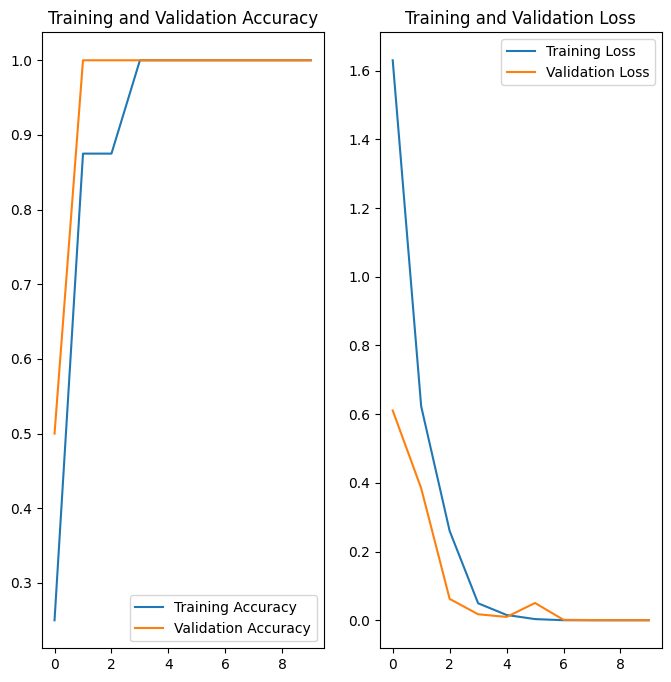

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [41]:
model.save(r'O:\source\repos\EVE-Online-Bot\training_data\screen_state.h5')

In [42]:
new_model = tf.keras.models.load_model(r'O:\source\repos\EVE-Online-Bot\training_data\screen_state.h5')

In [61]:
f = open(r'O:\source\repos\EVE-Online-Bot\training_data\screen_state_classes.json', "r")
classes = json.loads(f.read())

In [62]:
classes

['connection_lost', 'in_flight', 'in_hanger']

In [65]:
in_flight = list(data_dir.glob('in_hanger/*'))
img = tf.keras.utils.load_img(
    in_flight[0], target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = new_model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(classes[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 13ms/step
This image most likely belongs to in_hanger with a 100.00 percent confidence.
